# SOBELフィルタ画像+Vgg16 で特徴抽出し全結合で分類学習
200x200　のソーベルフィルタ処理済画像が既に作られていること。
sobel_edge.ipynb

In [8]:
from __future__ import print_function
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" #use CPU
#os.environ["CUDA_VISIBLE_DEVICES"]="1" #use GPU
import keras
from keras.applications import VGG16
from keras.models import Sequential, load_model, model_from_json
from keras import models, optimizers, layers
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split  

from keras.preprocessing import image as images
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras import backend as K 
import os
import numpy as np  
import glob  
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

### 画像縦横連結

In [9]:
# 横方向連結
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst
# 縦方向連結
def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

## データの読み込み　トレーニング，テストの分割，ラベルの設定

In [10]:
# 水滴あり/なしの２クラス分類
num_classes = 2
folder = ["neg","pos"]   # neg..正常  pos..異常                                  
image_size = 200        # 画像サイズは200x200（既にリサイズ, ソーベルフィルタ処理済であるとする）

## 画像読み込み

In [11]:
x = []
y = []
# 全ファイル読み込み
for index, name in enumerate(folder):
    dir = "./CAPDB_pub/*/ROI/" + name          # ./CAPDBB/[キャップ種]/ROI/[neg|pos]
    files = glob.glob(dir + "*/sbf_*.bmp")   # 
    for i, file in enumerate(files):  
        print(file)
        image = Image.open(file)                       
        image = image.convert("RGB")    
        image = image.resize((image_size, image_size))
        data = np.asarray(image)        
        x.append(data)  
        y.append(index) 
# numpy に変換
x = np.array(x)   
y = np.array(y)  
# 学習データ、検証データに分割および規格化
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one-hot ラベル表現に
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

./CAPDB_pub\00Blue\ROI\neg100\sbf_0001.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0002.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0003.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0004.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0005.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0006.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0007.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0008.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0009.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0010.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0011.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0012.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0013.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0014.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0015.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0016.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0017.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0018.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0019.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0020.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0021.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0022.bmp
./CAPDB_pub\00Blue\ROI\neg100\sbf_0023.bmp
./CAPDB_pub

./CAPDB_pub\02NouKin\ROI\neg100\sbf_0033.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0034.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0035.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0036.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0037.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0038.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0039.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0040.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0041.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0042.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0043.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0044.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0045.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0046.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0047.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0048.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0049.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0050.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0051.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0052.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0053.bmp
./CAPDB_pub\02NouKin\ROI\neg100\sbf_0054.bmp
./CAPDB_pu

./CAPDB_pub\00Blue\ROI\pos350\sbf_0024.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0025.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0026.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0027.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0028.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0029.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0030.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0031.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0032.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0033.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0034.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0035.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0036.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0037.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0038.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0039.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0040.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0041.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0042.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0043.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0044.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0045.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0046.bmp
./CAPDB_pub

./CAPDB_pub\00Blue\ROI\pos350\sbf_0254.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0255.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0256.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0257.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0258.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0259.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0260.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0261.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0262.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0263.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0264.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0265.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0266.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0267.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0268.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0269.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0270.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0271.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0272.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0273.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0274.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0275.bmp
./CAPDB_pub\00Blue\ROI\pos350\sbf_0276.bmp
./CAPDB_pub

./CAPDB_pub\01Green\ROI\pos300\sbf_0132.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0133.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0134.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0135.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0136.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0137.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0138.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0139.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0140.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0141.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0142.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0143.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0144.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0145.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0146.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0147.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0148.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0149.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0150.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0151.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0152.bmp
./CAPDB_pub\01Green\ROI\pos300\sbf_0153.bmp
./CAPDB_pub\01Green\ROI\pos300\s

./CAPDB_pub\02NouKin\ROI\pos300\sbf_0060.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0061.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0062.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0063.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0064.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0065.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0066.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0067.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0068.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0069.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0070.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0071.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0072.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0073.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0074.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0075.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0076.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0077.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0078.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0079.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0080.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0081.bmp
./CAPDB_pu

./CAPDB_pub\02NouKin\ROI\pos300\sbf_0286.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0287.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0288.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0289.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0290.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0291.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0292.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0293.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0294.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0295.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0296.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0297.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0298.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0299.bmp
./CAPDB_pub\02NouKin\ROI\pos300\sbf_0300.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0001.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0002.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0003.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0004.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0005.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0006.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0007.bmp
./C

./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0171.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0172.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0173.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0174.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0175.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0176.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0177.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0178.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0179.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0180.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0181.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0182.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0183.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0184.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0185.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0186.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0187.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0188.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0189.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0190.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\sbf_0191.bmp
./CAPDB_pub\03HakuKin\ROI\pos300\s

## VGGモデルの設計

In [12]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
last = vgg_conv.output

mod = Flatten()(last)
mod = Dense(1024, activation='relu')(mod)
mod = Dropout(0.5)(mod)
preds = Dense(2, activation='sigmoid')(mod)

model = models.Model(vgg_conv.input, preds)
model.summary()

epochs = 200
batch_size = 30

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.3),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
__________

## VGG特徴抽出結果から２クラス分類学習（時間かかります）

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Train on 1320 samples, validate on 330 samples
Epoch 1/200
1320/1320 [==============================] - 392s 297ms/step - loss: 0.6010 - acc: 0.7227 - val_loss: 0.5381 - val_acc: 0.7545
Epoch 2/200
1320/1320 [==============================] - 388s 294ms/step - loss: 0.5798 - acc: 0.7367 - val_loss: 0.5194 - val_acc: 0.7545
Epoch 3/200
1320/1320 [==============================] - 381s 289ms/step - loss: 0.5630 - acc: 0.7379 - val_loss: 0.5004 - val_acc: 0.7545
Epoch 4/200
1320/1320 [==============================] - 380s 288ms/step - loss: 0.5403 - acc: 0.7489 - val_loss: 0.4834 - val_acc: 0.7545
Epoch 5/200
1320/1320 [==============================] - 381s 288ms/step - loss: 0.5124 - acc: 0.7636 - val_loss: 0.4649 - val_acc: 0.7545
Epoch 6/200
1320/1320 [==============================] - 380s 288ms/step - loss: 0.5092 - acc: 0.7583 - val_loss: 0.4489 - val_acc: 0.7545
Epoch 7/200
1320/1320 [==============================] - 381s 289ms/step - loss: 0.4954 - acc: 0.7735 - val_loss: 0.432

1320/1320 [==============================] - 376s 285ms/step - loss: 0.0812 - acc: 0.9686 - val_loss: 0.1043 - val_acc: 0.9591
Epoch 60/200
1320/1320 [==============================] - 377s 286ms/step - loss: 0.0744 - acc: 0.9731 - val_loss: 0.0775 - val_acc: 0.9697
Epoch 61/200
1320/1320 [==============================] - 375s 284ms/step - loss: 0.0696 - acc: 0.9784 - val_loss: 0.0679 - val_acc: 0.9833
Epoch 62/200
1320/1320 [==============================] - 377s 285ms/step - loss: 0.0694 - acc: 0.9754 - val_loss: 0.0794 - val_acc: 0.9652
Epoch 63/200
1320/1320 [==============================] - 376s 285ms/step - loss: 0.0734 - acc: 0.9742 - val_loss: 0.0663 - val_acc: 0.9818
Epoch 64/200
1320/1320 [==============================] - 377s 286ms/step - loss: 0.0647 - acc: 0.9780 - val_loss: 0.0850 - val_acc: 0.9606
Epoch 65/200
1320/1320 [==============================] - 375s 284ms/step - loss: 0.0639 - acc: 0.9765 - val_loss: 0.0835 - val_acc: 0.9697
Epoch 66/200
1320/1320 [=========

1320/1320 [==============================] - 371s 281ms/step - loss: 0.0269 - acc: 0.9932 - val_loss: 0.0444 - val_acc: 0.9909
Epoch 118/200
1320/1320 [==============================] - 371s 281ms/step - loss: 0.0256 - acc: 0.9943 - val_loss: 0.0470 - val_acc: 0.9818
Epoch 119/200
1320/1320 [==============================] - 371s 281ms/step - loss: 0.0212 - acc: 0.9955 - val_loss: 0.0682 - val_acc: 0.9682
Epoch 120/200
1320/1320 [==============================] - 371s 281ms/step - loss: 0.0281 - acc: 0.9920 - val_loss: 0.0489 - val_acc: 0.9803
Epoch 121/200
1320/1320 [==============================] - 372s 282ms/step - loss: 0.0324 - acc: 0.9886 - val_loss: 0.0508 - val_acc: 0.9788
Epoch 122/200
1320/1320 [==============================] - 372s 282ms/step - loss: 0.0229 - acc: 0.9939 - val_loss: 0.0624 - val_acc: 0.9697
Epoch 123/200
1320/1320 [==============================] - 373s 282ms/step - loss: 0.0290 - acc: 0.9902 - val_loss: 0.0490 - val_acc: 0.9803
Epoch 124/200
1320/1320 [==

1320/1320 [==============================] - 372s 281ms/step - loss: 0.0169 - acc: 0.9951 - val_loss: 0.0452 - val_acc: 0.9818
Epoch 176/200
1320/1320 [==============================] - 372s 282ms/step - loss: 0.0113 - acc: 0.9973 - val_loss: 0.0353 - val_acc: 0.9879
Epoch 177/200
1320/1320 [==============================] - 371s 281ms/step - loss: 0.0142 - acc: 0.9955 - val_loss: 0.0560 - val_acc: 0.9788
Epoch 178/200
1320/1320 [==============================] - 372s 282ms/step - loss: 0.0231 - acc: 0.9936 - val_loss: 0.0357 - val_acc: 0.9864
Epoch 179/200
1320/1320 [==============================] - 372s 282ms/step - loss: 0.0115 - acc: 0.9977 - val_loss: 0.0617 - val_acc: 0.9742
Epoch 180/200
1320/1320 [==============================] - 373s 282ms/step - loss: 0.0113 - acc: 0.9973 - val_loss: 0.0331 - val_acc: 0.9894
Epoch 181/200
1320/1320 [==============================] - 371s 281ms/step - loss: 0.0116 - acc: 0.9970 - val_loss: 0.0323 - val_acc: 0.9848
Epoch 182/200
1320/1320 [==

 ## モデルを保存

In [14]:
model.save_weights('sobel_grad_vgg16_weight_PET_ALL200-2nd.h5') #全種キャップ学習結果を保存

## acc と loss を表示

330/330 [==============================] - 21s 64ms/step
Test loss: 0.0379900597154946
Test accuracy: 0.9848484848484849


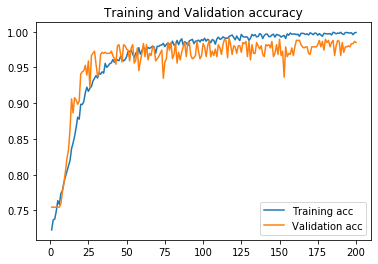

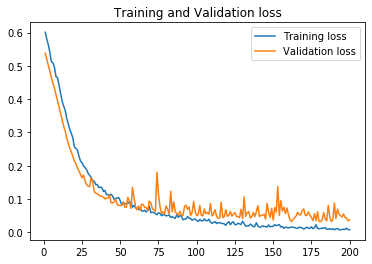

In [15]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

### Plot accuracy & loss
import matplotlib.pyplot as plt 

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

#plot accuracy
plt.plot(epochs, acc, label = "Training acc" )
plt.plot(epochs, val_acc, label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

#plot loss
plt.plot(epochs, loss,  label = "Training loss" )
plt.plot(epochs, val_loss, label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()